In [22]:
# The library finction is usedto load libraries or group of functions
# and datasets not included in the base R distribution
library(MASS)
library(ISLR2)


## Simple Linear Regression

The ISLR2 library contains the Boston data set, which records **medv** (median
house value) for 506 census tracts in Boston. We will seek to predict
medv using 12 predictors such as rm (average number of rooms per house),
age (average age of houses), and lstat (percent of households with low
socioeconomic status).

In [23]:
# Lets get a sample of the medv data

head(Boston)

# Find out more about the Boston Dataset

?Boston

crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
0.00632,18,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
0.02731,0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
0.02729,0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
0.03237,0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
0.06905,0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2
0.02985,0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,5.21,28.7


Boston                  package:ISLR2                  R Documentation

_B_o_s_t_o_n _D_a_t_a

_D_e_s_c_r_i_p_t_i_o_n:

     A data set containing housing values in 506 suburbs of Boston.

_U_s_a_g_e:

     Boston
     
_F_o_r_m_a_t:

     A data frame with 506 rows and 13 variables.

     'crim' per capita crime rate by town.

     'zn' proportion of residential land zoned for lots over 25,000
          sq.ft.

     'indus' proportion of non-retail business acres per town.

     'chas' Charles River dummy variable (= 1 if tract bounds river; 0
          otherwise).

     'nox' nitrogen oxides concentration (parts per 10 million).

     'rm' average number of rooms per dwelling.

     'age' proportion of owner-occupied units built prior to 1940.

     'dis' weighted mean of distances to five Boston employment
          centres.

     'rad' index of accessibility to radial highways.

     'tax' full-value property-tax rate per $10,000.

     'ptratio' pup

We will start by using the function to fit a simple linear regression model, with as the response and
as the predictor. The basic medv lstat syntax is **lm(y ~ x, data)**, where y is the response, x
is the predictor, and is the data set in which these two variables are kept.

In [24]:
# Call the Boston Dataset into yout workspace
data(Boston)

# Perform a linear regression on the Boston dataset
lm_fit <- lm(medv ~ lstat, data = Boston)

# Get a summary of the regression line
summary(lm_fit)


Call:
lm(formula = medv ~ lstat, data = Boston)

Residuals:
    Min      1Q  Median      3Q     Max 
-15.168  -3.990  -1.318   2.034  24.500 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 34.55384    0.56263   61.41   <2e-16 ***
lstat       -0.95005    0.03873  -24.53   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 6.216 on 504 degrees of freedom
Multiple R-squared:  0.5441,	Adjusted R-squared:  0.5432 
F-statistic: 601.6 on 1 and 504 DF,  p-value: < 2.2e-16


We can use the names() function in order to find out what other pieces of information are stored in lm.fit. Although we can extract these quantities by name—e.g. lm.fit$coefficients—it is safer to use the extractor functions like coef() to access them.

In [25]:
names(lm_fit)

# Extrac coefficients 
coef(lm_fit)

[1] "coefficients"  "residuals"     "effects"       "rank"         
 [5] "fitted.values" "assign"        "qr"            "df.residual"  
 [9] "xlevels"       "call"          "terms"         "model"

(Intercept)       lstat 
 34.5538409  -0.9500494

In order to obtain a confidence interval for the coefficient estimates, we can
use the confint() command.

In [26]:
confint(lm_fit)

,2.5 %,97.5 %
(Intercept),33.448457,35.6592247
lstat,-1.026148,-0.8739505


The predict() function can be used to produce confidence intervals and
prediction intervals for the prediction of medv for a given value of lstat.

In [27]:
# Confidence Intervals
predict(lm_fit, data.frame(lstat = (c(5, 10, 15))), interval = "confidence")

fit,lwr,upr
29.80359,29.00741,30.59978
25.05335,24.47413,25.63256
20.30310,19.73159,20.87461


In [28]:
# Prediction Interval
predict(lm_fit, data.frame(lstat = (c(5, 10, 15))), interval = "prediction")

fit,lwr,upr
29.80359,17.565675,42.04151
25.05335,12.827626,37.27907
20.30310,8.077742,32.52846


For instance, the 95% confidence interval associated with a lstat value of
10 is (24.47, 25.63), and the 95% prediction interval is (12.828, 37.28). As
expected, the confidence and prediction intervals are centered around the
same point (a predicted value of 25.05 for medv when lstat equals 10), but
the latter are substantially wider.
We will now plot medv and lstat along with the least squares regression
line using the plot() and abline() functions.

The following objects are masked from Boston (pos = 6):

    age, chas, crim, dis, indus, lstat, medv, nox, ptratio, rad, rm,
    tax, zn



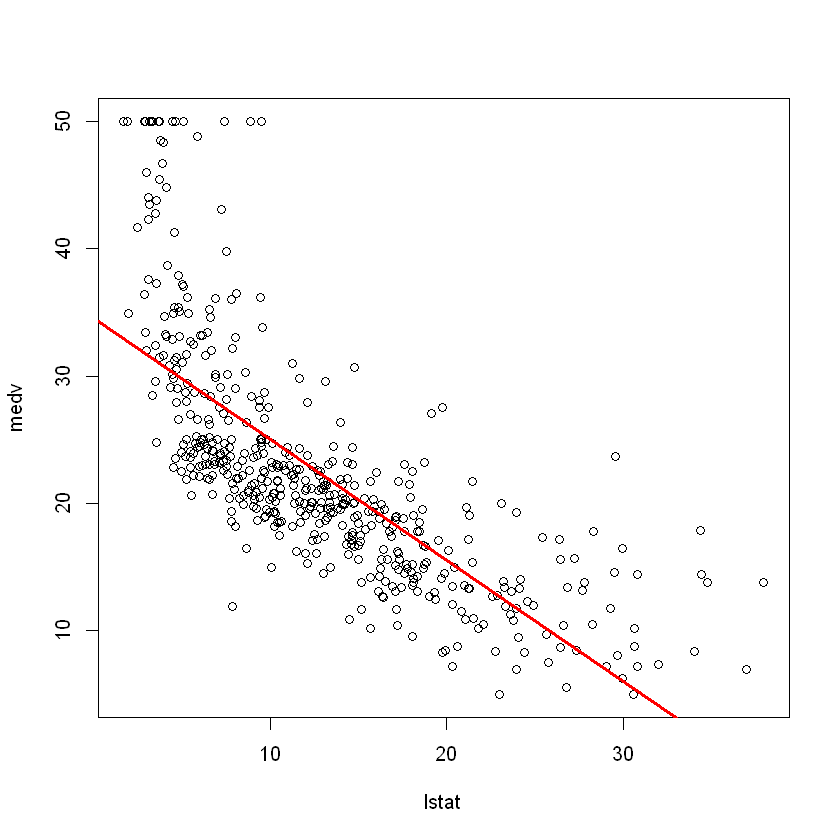

In [29]:
# Plot
attach(Boston)
plot(lstat, medv)

# Draw the regression line
abline(lm_fit, lwd = 3, col = "red")

There is some evidence for non-linearity in the relationship between lstat
and medv. We will explore this issue later in this lab.
The abline() function can be used to draw any line, not just the least
squares regression line. To draw a line with intercept a and slope b, we
type abline(a, b). Below we experiment with some additional settings for
plotting lines and points. The lwd = 3 command causes the width of the
regression line to be increased by a factor of 3; this works for the plot() and
lines() functions also. We can also use the pch option to create different
plotting symbols.

We can achieve this by using the par() and mfrow() functions, which tell R, to split the display screen into separate panels so that multiple plots can be viewed simultaneously.

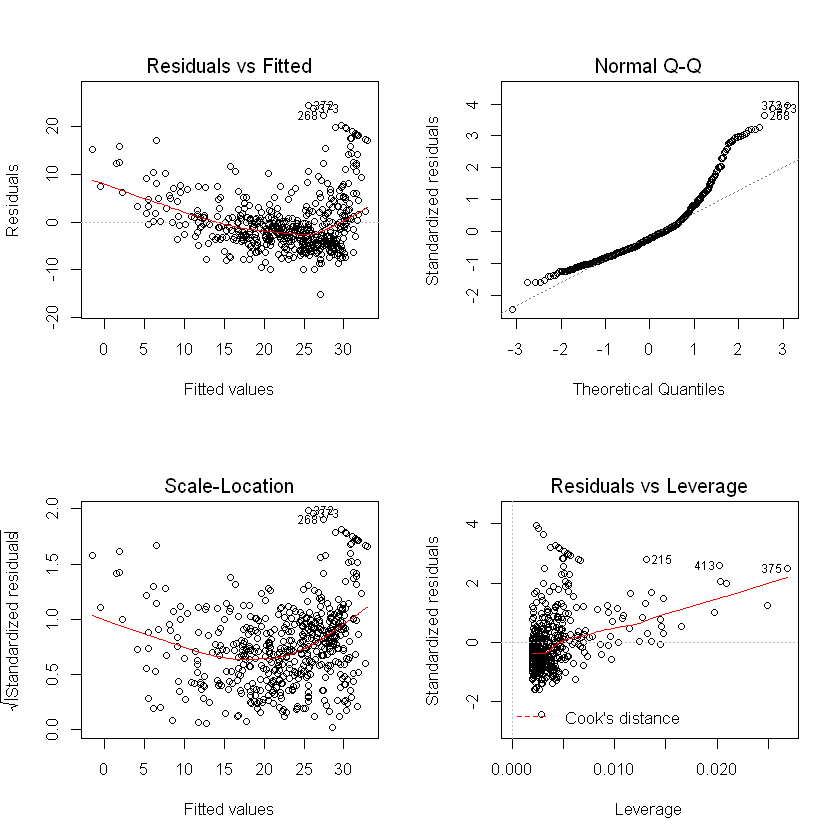

In [30]:
# Plot 4 graphs on the same diagram

par(mfrow = c(2, 2))

# Plot 1
plot(lm_fit)


On the basis of the residual plots, there is some evidence of non-linearity.
Leverage statistics can be computed for any number of predictors using the
hatvalues() function.

375 
375

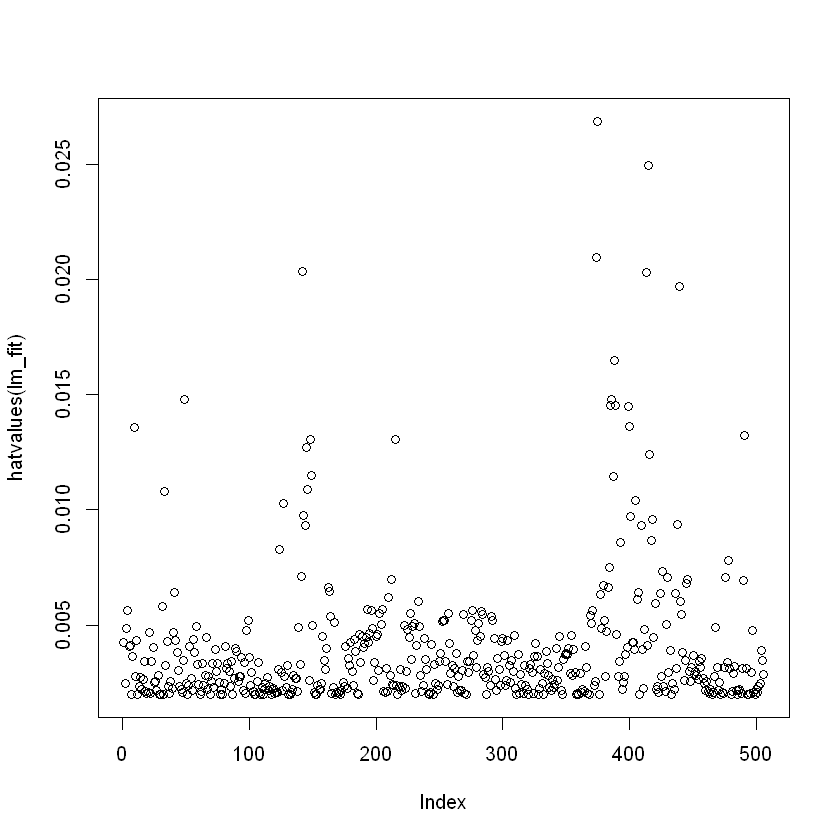

In [31]:
plot(hatvalues(lm_fit))

which.max(hatvalues(lm_fit))

### Multiple Linear Regression

In order to fit a multiple linear regression model using least squares, we
again use the lm() function. The syntax lm(y ∼ x1 + x2 + x3) is used to
fit a model with three predictors, x1, x2, and x3. The summary() function
now outputs the regression coefficients for all the predictors.

In [32]:
# Multiple Linear Regression
lm_fit <- lm(medv ~ lstat + age, data = Boston)

# Get a summary of the data
summary(lm_fit)


Call:
lm(formula = medv ~ lstat + age, data = Boston)

Residuals:
    Min      1Q  Median      3Q     Max 
-15.981  -3.978  -1.283   1.968  23.158 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 33.22276    0.73085  45.458  < 2e-16 ***
lstat       -1.03207    0.04819 -21.416  < 2e-16 ***
age          0.03454    0.01223   2.826  0.00491 ** 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 6.173 on 503 degrees of freedom
Multiple R-squared:  0.5513,	Adjusted R-squared:  0.5495 
F-statistic:   309 on 2 and 503 DF,  p-value: < 2.2e-16


The Boston data set contains 12 variables, and so it would be cumbersome
to have to type all of these in order to perform a regression using all of the
predictors. Instead, we can use the following short-hand:

In [33]:
lm_fit <- lm(medv ~ ., data = Boston)

summary(lm_fit)


Call:
lm(formula = medv ~ ., data = Boston)

Residuals:
     Min       1Q   Median       3Q      Max 
-15.1304  -2.7673  -0.5814   1.9414  26.2526 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  41.617270   4.936039   8.431 3.79e-16 ***
crim         -0.121389   0.033000  -3.678 0.000261 ***
zn            0.046963   0.013879   3.384 0.000772 ***
indus         0.013468   0.062145   0.217 0.828520    
chas          2.839993   0.870007   3.264 0.001173 ** 
nox         -18.758022   3.851355  -4.870 1.50e-06 ***
rm            3.658119   0.420246   8.705  < 2e-16 ***
age           0.003611   0.013329   0.271 0.786595    
dis          -1.490754   0.201623  -7.394 6.17e-13 ***
rad           0.289405   0.066908   4.325 1.84e-05 ***
tax          -0.012682   0.003801  -3.337 0.000912 ***
ptratio      -0.937533   0.132206  -7.091 4.63e-12 ***
lstat        -0.552019   0.050659 -10.897  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

We can access the individual components of a summary object by name (type ?summary.lm to see what is available). Hence summary(lm.fit)$r.sq gives us the R2, and summary(lm.fit)$sigma gives us the RSE. The vif()function, part of the car package, can be used to compute variance inflation factors. Most VIF’s are low to moderate for this data.

In [34]:
library(car)

# Check for Multicollinearity
vif(lm_fit)

crim       zn    indus     chas      nox       rm      age      dis 
1.767486 2.298459 3.987181 1.071168 4.369093 1.912532 3.088232 3.954037 
     rad      tax  ptratio    lstat 
7.445301 9.002158 1.797060 2.870777

What if we would like to perform a regression using all of the variables but
one? For example, in the above regression output, age has a high p-value.
So we may wish to run a regression excluding this predictor. The following
syntax results in a regression using all predictors except age.

In [35]:
# Regression line
lm_fit_1 <- lm(medv ~ . - age, data = Boston)

# Summary of Fit
summary(lm_fit_1)


Call:
lm(formula = medv ~ . - age, data = Boston)

Residuals:
     Min       1Q   Median       3Q      Max 
-15.1851  -2.7330  -0.6116   1.8555  26.3838 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  41.525128   4.919684   8.441 3.52e-16 ***
crim         -0.121426   0.032969  -3.683 0.000256 ***
zn            0.046512   0.013766   3.379 0.000785 ***
indus         0.013451   0.062086   0.217 0.828577    
chas          2.852773   0.867912   3.287 0.001085 ** 
nox         -18.485070   3.713714  -4.978 8.91e-07 ***
rm            3.681070   0.411230   8.951  < 2e-16 ***
dis          -1.506777   0.192570  -7.825 3.12e-14 ***
rad           0.287940   0.066627   4.322 1.87e-05 ***
tax          -0.012653   0.003796  -3.333 0.000923 ***
ptratio      -0.934649   0.131653  -7.099 4.39e-12 ***
lstat        -0.547409   0.047669 -11.483  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 4.794 on 494 degrees o

### Interaction Terms

It is easy to include interaction terms in a linear model using the lm()
function. The syntax lstat:black tells R to include an interaction term between
lstat and black. The syntax lstat * age simultaneously includes
lstat, age, and the interaction term lstat×age as predictors; it is a shorthand
for lstat + age + lstat:age.

In [36]:
summary(lm(medv ~ lstat * age, data = Boston))


Call:
lm(formula = medv ~ lstat * age, data = Boston)

Residuals:
    Min      1Q  Median      3Q     Max 
-15.806  -4.045  -1.333   2.085  27.552 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) 36.0885359  1.4698355  24.553  < 2e-16 ***
lstat       -1.3921168  0.1674555  -8.313 8.78e-16 ***
age         -0.0007209  0.0198792  -0.036   0.9711    
lstat:age    0.0041560  0.0018518   2.244   0.0252 *  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 6.149 on 502 degrees of freedom
Multiple R-squared:  0.5557,	Adjusted R-squared:  0.5531 
F-statistic: 209.3 on 3 and 502 DF,  p-value: < 2.2e-16


### Non Linear Transformations

The function can also accommodate non-linear transformations of the lm() X2
predictors. For instance, given a predictor X, we can create a predictor using
I(X^2).

In [37]:
lm_fit_2 <- lm(medv ~ lstat + I(lstat^2))

summary(lm_fit_2)


Call:
lm(formula = medv ~ lstat + I(lstat^2))

Residuals:
     Min       1Q   Median       3Q      Max 
-15.2834  -3.8313  -0.5295   2.3095  25.4148 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 42.862007   0.872084   49.15   <2e-16 ***
lstat       -2.332821   0.123803  -18.84   <2e-16 ***
I(lstat^2)   0.043547   0.003745   11.63   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 5.524 on 503 degrees of freedom
Multiple R-squared:  0.6407,	Adjusted R-squared:  0.6393 
F-statistic: 448.5 on 2 and 503 DF,  p-value: < 2.2e-16


The near-zero p-value associated with the quadratic term suggests that
it leads to an improved model. We use the anova() function to further
anova() quantify the extent to which the quadratic fit is superior to the linear fit

In [38]:
lm_fit_1 <- lm(medv ~ lstat, data = Boston)

# Working with Anova
anova(lm_fit_1, lm_fit_2)

Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
504,19472.38,NA,NA,NA,NA
503,15347.24,1,4125.138,135.1998,7.630116e-28


Here Model 1 represents the linear submodel containing only one predictor,
lstat, while Model 2 corresponds to the larger quadratic model that has two
predictors, lstat and lstat2. The anova() function performs a hypothesis
test comparing the two models. The null hypothesis is that the two models
fit the data equally well, and the alternative hypothesis is that the full
model is superior. Here the F-statistic is 135 and the associated p-value is
virtually zero. This provides very clear evidence that the model containing
the predictors lstat and lstat2 is far superior to the model that only
contains the predictor lstat. This is not surprising, since earlier we saw
evidence for non-linearity in the relationship between medv and lstat.

### Qualitative Predictors

The Carseats data includes qualitative predictors such as Shelveloc, an indicator
of the quality of the shelving location—that is, the space within
a store in which the car seat is displayed—at each location. The predictor
Shelveloc takes on three possible values: Bad, Medium, and Good.
Given a qualitative variable such as Shelveloc, R generates dummy variables
automatically.

In [39]:
# View the Carseats Data
head(Carseats)

Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
11.22,111,48,16,260,83,Good,65,10,Yes,Yes
10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4.15,141,64,3,340,128,Bad,38,13,Yes,No
10.81,124,113,13,501,72,Bad,78,16,No,Yes


In [40]:
# Perofrming regression on Car Seats Data

lm_fit <- lm(Sales ~ . + Income:Advertising + Price:Age, data = Carseats)

summary(lm_fit)


Call:
lm(formula = Sales ~ . + Income:Advertising + Price:Age, data = Carseats)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.9208 -0.7503  0.0177  0.6754  3.3413 

Coefficients:
                     Estimate Std. Error t value Pr(>|t|)    
(Intercept)         6.5755654  1.0087470   6.519 2.22e-10 ***
CompPrice           0.0929371  0.0041183  22.567  < 2e-16 ***
Income              0.0108940  0.0026044   4.183 3.57e-05 ***
Advertising         0.0702462  0.0226091   3.107 0.002030 ** 
Population          0.0001592  0.0003679   0.433 0.665330    
Price              -0.1008064  0.0074399 -13.549  < 2e-16 ***
ShelveLocGood       4.8486762  0.1528378  31.724  < 2e-16 ***
ShelveLocMedium     1.9532620  0.1257682  15.531  < 2e-16 ***
Age                -0.0579466  0.0159506  -3.633 0.000318 ***
Education          -0.0208525  0.0196131  -1.063 0.288361    
UrbanYes            0.1401597  0.1124019   1.247 0.213171    
USYes              -0.1575571  0.1489234  -1.058 0.290729    
Inco

The contrasts() function returns the coding that R uses for the dummy variables.

In [41]:
attach(Carseats)
contrasts(ShelveLoc)

The following objects are masked from Carseats (pos = 4):

    Advertising, Age, CompPrice, Education, Income, Population, Price,
    Sales, ShelveLoc, Urban, US



,Good,Medium
Bad,0,0
Good,1,0
Medium,0,1


R has created a ShelveLocGood dummy variable that takes on a value of
1 if the shelving location is good, and 0 otherwise. It has also created a
ShelveLocMedium dummy variable that equals 1 if the shelving location is
medium, and 0 otherwise. A bad shelving location corresponds to a zero
for each of the two dummy variables. The fact that the coefficient for
ShelveLocGood in the regression output is positive indicates that a good
shelving location is associated with high sales (relative to a bad location).
And ShelveLocMedium has a smaller positive coefficient, indicating that a
medium shelving location is associated with higher sales than a bad shelving
location but lower sales than a good shelving location.